# Back Propagation

## 1. loading of data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pickle
import numpy as np
import math
import operator
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]                                                   
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# 2. Computational graph

<img src='https://i.imgur.com/seSGbNS.png'>

<pre>
1. if you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]
2. the final output of this graph is a value L which is computed as (Y-Y')^2
</pre>

### Task 1: Implementing backpropagation and Gradient checking


<pre>1. <b>Check this video for better understanding of the computational graphs and back propagation:</b> <a href='https://www.youtube.com/watch?v=i94OvYb6noo#t=1m33s'>https://www.youtube.com/watch?v=i94OvYb6noo</a>
</pre>

<pre>
2. <b>write two functions</b>

#you can modify the definition of this function according to your needs
<font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, ..., W[8] corresponds to w9 in graph.
        # write code to compute the value of L=(y-y')^2
        </font>
        return (L, any other variables which you might need to use for back propagation)
        <font color='grey'>
        # Hint: you can use dict type to store the required intermediate variables 
        </font>
</font>
</pre>

<pre>
# you can modify the definition of this function according to your needs
<font color='blue'>
def backward_propagation(L, Variables):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # Variables: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        </font>
        return dW
        <font color='grey'>
        # here dW can be a list, or dict or any other data type wich will have gradients of all the weights
        # Hint: you can use dict type to store the required variables 
        </font>
</font>
</pre>
3. <b> <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>Gradient checking</a></b>:<a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> 

<pre>we know that the derivative of any function is </pre>$$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$
<pre>
The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of gradient checking!

</pre>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}

to do this task you need to write a function 
<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):
    <font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()
    </font>
    approx_gradients = []
    for each wi weight value in W:
        <font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi
        </font>
        approx_gradients.append(approximation gradients of weight wi)
    <font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with      gradient_check formula
    </font>
    return gradient_check
</font>
NOTE: you can do sanity check by checking all the return values of gradient_checking(), they have to be zero. if not you have bug in your code
</pre>

### Task 2: Optimizers

1. As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
2. check this video and blog: https://www.youtube.com/watch?v=gYpoJMlgyXA,  http://cs231n.github.io/neural-networks-3/
3. use the same computational graph that was mentioned above to do this task
4. initilze the 9 weights from normal distribution with mean=0 and std=0.01

5. 

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

6.

<pre>
<b>task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights
<b>task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights
<b>task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights
</pre>



In [2]:
W = np.random.normal(0, 0.01, 9)

In [3]:
def sigmoid(x):
    '''
    Function to calculate sigmoid
    
    Fx= 1 / 1 + exp^-x

    '''
    return 1 / (1 + np.exp(-x))

In [4]:
def tanh(x):
    '''
    Function to calculate tanh
    
    exp(x) - exp(-x) / exp(x) + exp(-x)
    
    '''
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

In [5]:
def forward_propagation(x,y,w):
    '''
    Function to calculate Forward Propagation of a MLP
    
    '''
    
    L11 = w[0]*x[0]
    L12 = w[1]*x[1]
    L21 = L11+L12
    L22 = L11+L12
    L23 = w[2]*x[2]
    L24 = w[3]*x[3]
    L25 = w[4]*x[4]
    L31 = L21*L22
    L32 = np.sin(L23)
    L33 = L24+L25
    L41 = w[5] + L31
    L42 = L32*L33
    L51 = np.exp(L41)
    L52 = w[7] + L42
    L61 = w[6] + L51
    L62 = sigmoid(L52)
    L71 = tanh(L61)
    L72 = w[8]*L62
    L81 = L71 + L72
    y_dash = L81
    Loss = (y - y_dash)**2

    Loss_dict = {'L11':L11,'L12':L12,'L21':L21,'L22':L22,'L23':L23,'L24':L24,'L25':L25,'L31':L31,'L32':L32,'L33':L33,
                'L41':L41,'L42':L42,'L51':L51,'L52':L52,'L61':L61,'L62':L62,'L71':L71,'L72':L72,'L72':L72,'L81':L81,
                'y_dash':y_dash,'Loss':Loss} #Storing in a dictionary {Output Name: Value}
    
    return Loss, y_dash, Loss_dict    

In [6]:
def backward_propagation(loss, y_dash, x, y, w, loss_dt):
    '''
    Function to calculate Backward Propagation of a MLP
    
    '''
    #Calculated Gradients of the given Graph
    dl_by_dydash = 2*(y_dash - y)
    dydash_by_d071 = 1
    d071_by_d061 = (1 - (tanh(loss_dt['L61']))**2)
    d061_by_d051 = 1
    d051_by_d041 = np.exp(loss_dt['L41'])
    d041_by_d031 = 1
    d031_by_d021 = loss_dt['L22']
    d021_by_d011 = 1
    d022_by_d011 = 1
    d011_by_dw1 = x[0]
    d022_by_d012 = 1
    d021_by_d012 = 1
    d012_by_dw2 = x[1]
    d031_by_d022 = loss_dt['L21']
    dydash_by_d072 = 1
    d072_by_d062 = w[8]
    d062_by_d052 = sigmoid(loss_dt['L52']) * (1 - sigmoid(loss_dt['L52']))
    d052_by_d042 = 1
    d042_by_d032 = loss_dt['L33']
    d032_by_d023 = np.cos(loss_dt['L23'])
    d023_by_dw3 = x[2]
    d042_by_d033 = loss_dt['L32']
    d033_by_d024 = 1
    d024_by_dw4 = x[3]
    d033_by_d025 = 1
    d025_by_dw5 = x[4]
    d041_by_dw6 = 1
    d061_by_dw7 = 1
    d052_by_dw8 = 1
    d072_by_dw9 = loss_dt['L62']
    
    dw1 = dl_by_dydash*dydash_by_d071*d071_by_d061*d061_by_d051*d051_by_d041*d041_by_d031*((d031_by_d021*d021_by_d011*d011_by_dw1)+(d031_by_d022*d022_by_d011*d011_by_dw1))   
    dw2 = dl_by_dydash*dydash_by_d071*d071_by_d061*d061_by_d051*d051_by_d041*d041_by_d031*((d031_by_d022*d022_by_d012*d012_by_dw2)+(d031_by_d021*d021_by_d012*d012_by_dw2))
    dw3 = dl_by_dydash*dydash_by_d072*d072_by_d062*d062_by_d052*d052_by_d042*d042_by_d032*d032_by_d023*d023_by_dw3
    dw4 = dl_by_dydash*dydash_by_d072*d072_by_d062*d062_by_d052*d052_by_d042*d042_by_d033*d033_by_d024*d024_by_dw4
    dw5 = dl_by_dydash*dydash_by_d072*d072_by_d062*d062_by_d052*d052_by_d042*d042_by_d033*d033_by_d025*d025_by_dw5
    dw6 = dl_by_dydash*dydash_by_d071*d071_by_d061*d061_by_d051*d051_by_d041*d041_by_dw6
    dw7 = dl_by_dydash*dydash_by_d071*d071_by_d061*d061_by_dw7
    dw8 = dl_by_dydash*dydash_by_d072*d072_by_d062*d062_by_d052*d052_by_dw8
    dw9 = dl_by_dydash*dydash_by_d072*d072_by_dw9
    
    dw = [dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9]
    return dw

Gradient Checking:

In [13]:
def gradient_checking(x,y,w):
    '''
    Function to check the gradients generated using Function Forward Propagation and Function Backward Propagation
    
    '''
    epsilon = 1e-07
    Loss1, y_dash1, Loss_dict1 = forward_propagation(x,y,w)
    grad = backward_propagation(Loss1, y_dash1, x, y, w, Loss_dict1)
    
    approx_gradients = []
    gradient_check_list = []
    for wi in range(len(w)):
        w_new = np.copy(w)
        w_new[wi]= w_new[wi] + epsilon #Adding a small value epsilon to wi
        w_new_n = np.copy(w)
        w_new_n[wi] = w_new_n[wi] - epsilon #Subtracting a small value epsilon to wi
        loss_p, yy, Ll = forward_propagation(x,y,w_new)
        loss_n, yy, Ll = forward_propagation(x,y,w_new_n)
        grad_approx = (loss_p - loss_n)/(2*epsilon) #Approximated grad value
        approx_gradients.append(grad_approx)
        
        diff = list(map(operator.sub, approx_gradients, grad))
        numerator = np.linalg.norm(diff) #L2-norm
        denominator = np.linalg.norm(grad) + np.linalg.norm(approx_gradients)
    
        gradient_check = numerator/denominator
        gradient_check_list.append(gradient_check)
    
        if gradient_check < 1e-07:
            print('The Gradient Check is Correct and Successful')
        else:
            print('There is a Mistake')
        
    
    return gradient_check_list

In [15]:
W = np.random.normal(0, 0.01, 9)
datapoint = 1

gc = gradient_checking(X[datapoint],y[datapoint],W)
print('\nGradient Check:\n',gc)

The Gradient Check is Correct and Successful
The Gradient Check is Correct and Successful
The Gradient Check is Correct and Successful
The Gradient Check is Correct and Successful
The Gradient Check is Correct and Successful
The Gradient Check is Correct and Successful
The Gradient Check is Correct and Successful
The Gradient Check is Correct and Successful
The Gradient Check is Correct and Successful

Gradient Check:
 [4.4730685262425185e-10, 1.1672961411351353e-09, 1.327029028349624e-09, 1.458393737895507e-09, 1.5756787970160823e-09, 1.3653765007918224e-09, 1.1893118941174437e-09, 1.2090543376931965e-09, 1.089186219076824e-09]


# Task 2

Task 2.1: Vanilla Update

In [84]:
from sklearn.metrics import mean_squared_error
w = np.random.normal(0, 0.01, 9)

In [93]:
learning_rate = 0.001
epoch = range(1,100)
loss_list = []
w1 = np.copy(w)
for i in epoch:
    for j in range(len(X)):
        loss1, y_dash_val, loss_dict1 = forward_propagation(X[j],y[j],w1)
        dw = backward_propagation(loss1, y_dash_val, X[j], y[j], w1, loss_dict1)
    w1 = w1-[x * learning_rate for x in dw]
    loss_list.append(loss1)
    print('The updated value of loss is {} in Epoch {}'.format(loss1,i))    

The updated value of loss is 0.6921482822190134 in Epoch 1
The updated value of loss is 0.6905156026955854 in Epoch 2
The updated value of loss is 0.6888901531569488 in Epoch 3
The updated value of loss is 0.6872718820676638 in Epoch 4
The updated value of loss is 0.6856607383727135 in Epoch 5
The updated value of loss is 0.6840566714921618 in Epoch 6
The updated value of loss is 0.682459631315883 in Epoch 7
The updated value of loss is 0.6808695681983529 in Epoch 8
The updated value of loss is 0.6792864329535092 in Epoch 9
The updated value of loss is 0.677710176849673 in Epoch 10
The updated value of loss is 0.676140751604539 in Epoch 11
The updated value of loss is 0.6745781093802221 in Epoch 12
The updated value of loss is 0.6730222027783707 in Epoch 13
The updated value of loss is 0.6714729848353415 in Epoch 14
The updated value of loss is 0.6699304090174298 in Epoch 15
The updated value of loss is 0.6683944292161634 in Epoch 16
The updated value of loss is 0.6668649997436564 in E

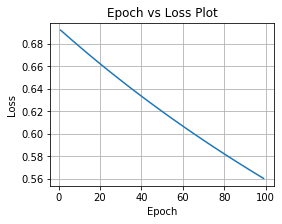

In [92]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,3))
plt.plot(epoch,loss_list)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss Plot')
plt.show()

Task 2.2: Momentum Update

In [95]:
learning_rate = 0.001
v = np.zeros(len(w))
epoch = range(1,100)
mu = 0.9
loss_list = []
w2 = np.copy(w)
for i in epoch:
    for j in range(len(X)):
        loss1, y_dash_val, loss_dict1 = forward_propagation(X[j],y[j],w2)
        dw = backward_propagation(loss1, y_dash_val, X[j], y[j], w2, loss_dict1)
    v = mu * v - [x * learning_rate for x in dw]
    w2 = w2 + v
    loss_list.append(loss1)
    print('The updated value of w is {} in Epoch {}'.format(loss1,i))

The updated value of w is 0.6921482822190134 in Epoch 1
The updated value of w is 0.6905156026955854 in Epoch 2
The updated value of w is 0.6874270853084302 in Epoch 3
The updated value of w is 0.6830528118907335 in Epoch 4
The updated value of w is 0.6775542955723017 in Epoch 5
The updated value of w is 0.6710832027715771 in Epoch 6
The updated value of w is 0.6637805296185321 in Epoch 7
The updated value of w is 0.655776159407103 in Epoch 8
The updated value of w is 0.647188732620878 in Epoch 9
The updated value of w is 0.6381257672138619 in Epoch 10
The updated value of w is 0.628683973604291 in Epoch 11
The updated value of w is 0.6189497158310816 in Epoch 12
The updated value of w is 0.6089995772159075 in Epoch 13
The updated value of w is 0.5989009954445734 in Epoch 14
The updated value of w is 0.588712938077126 in Epoch 15
The updated value of w is 0.5784865950231909 in Epoch 16
The updated value of w is 0.56826606942951 in Epoch 17
The updated value of w is 0.5580890527083423 i

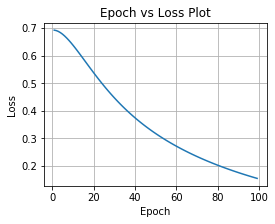

In [96]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,3))
plt.plot(epoch,loss_list)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss Plot')
plt.show()

Task 2.3: Adam Update

In [102]:
eps = 1e-8 #Taking the recommended values
beta1 = 0.9
beta2 = 0.999
learning_rate = 0.001
v = np.zeros(len(w))
m = np.zeros(len(w))
mt = np.zeros(len(w))
vt = np.zeros(len(w))
epoch = range(1,100)
w3 = np.copy(w)
loss_list = []
for i in epoch:
    for j in range(len(X)):
        loss1, y_dash_val, loss_dict1 = forward_propagation(X[j],y[j],w3)
        dw = backward_propagation(loss1, y_dash_val, X[j], y[j], w3, loss_dict1)
    m = beta1*m + [x * (1-beta1) for x in dw]
    v = beta2*v + [x * (1-beta2) for x in list(np.power(dw,2))]
    w3 = w3 - [x * learning_rate for x in m] / (np.sqrt(v)) + eps
    
    loss_list.append(loss1)
  
    print('The updated value of w is {} in Epoch {}'.format(loss1,i))

The updated value of w is 0.6921482822190134 in Epoch 1
The updated value of w is 0.6851882572423449 in Epoch 2
The updated value of w is 0.6759305613721335 in Epoch 3
The updated value of w is 0.6652847786882699 in Epoch 4
The updated value of w is 0.6537543245491555 in Epoch 5
The updated value of w is 0.641668538167386 in Epoch 6
The updated value of w is 0.6292590046062251 in Epoch 7
The updated value of w is 0.6166945983821501 in Epoch 8
The updated value of w is 0.6041007663099651 in Epoch 9
The updated value of w is 0.5915714201929958 in Epoch 10
The updated value of w is 0.5791768591465387 in Epoch 11
The updated value of w is 0.5669693400043992 in Epoch 12
The updated value of w is 0.5549871487400516 in Epoch 13
The updated value of w is 0.5432576613420681 in Epoch 14
The updated value of w is 0.531799693065024 in Epoch 15
The updated value of w is 0.5206253291894726 in Epoch 16
The updated value of w is 0.5097413677905887 in Epoch 17
The updated value of w is 0.49915046603034

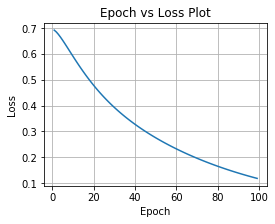

In [103]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,3))
plt.plot(epoch,loss_list)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss Plot')
plt.show()

Conclusions:
1. The Vanilla Update did a decent job of reducing the Loss. It reduced the loss by about 0.133 in 100 epochs.
2. The Momentum Update did an excellent job in reducing the Loss. It reduced the loss from 0.692 to 0.151, which is excellent.
3. The Adam Update did the best out of the 3. It reduced the loss from 0.692 to 0.118, which is the least loss that we have got.
4. So we can say that Adam Update is best to reduce the loss the most in less number of Epochs than Momentum and Vanilla Update